In [1]:
#import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


import xgboost as xg 



In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#Setting pandas view options
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
df_listing = pd.read_csv('listings.csv.gz')

In [5]:
df_listing.head(5)

id                         listing_url       scrape_id last_scraped  \
0  20815  https://www.airbnb.com/rooms/20815  20201027172200   2020-10-27   
1  27271  https://www.airbnb.com/rooms/27271  20201027172200   2020-10-28   
2  28318  https://www.airbnb.com/rooms/28318  20201027172200   2020-10-28   
3  29241  https://www.airbnb.com/rooms/29241  20201027172200   2020-10-28   
4  30697  https://www.airbnb.com/rooms/30697  20201027172200   2020-10-27   

                                   name  \
0     The Bosphorus from The Comfy Hill   
1  Lovely apartment in perfect location   
2       Cosy home overlooking Bosphorus   
3         ↪ Istanbul, Your second house   
4             nice home in popular area   

                                         description  \
0  Watch The Bosphorus from The Comfy Hill.<br />...   
1  This is a  nicely decorated apartment in an an...   
2  <b>The space</b><br />Easy access to both brid...   
3  <b>The space</b><br />There are many interesti...   
4  <b>The space</b><br />I can ensure you that th...   

                               neighborhood_overview  \
0  The lovely neighborhood, Arnavutkoy, is locate...   
1  Cihangir is one of Istanbul's cosmopolitan sub...   
2  Close to Bosphorus University<br />Close to Be...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/94805791/481d...    78838   
1  https://a0.muscache.com/pictures/2f9cfc85-8370...   117026   
2  https://a0.muscache.com/pictures/76617600/0ab5...   121721   
3  https://a0.muscache.com/pictures/12385994/b9ba...   125742   
4  https://a0.muscache.com/pictures/6392807/b6f01...   132137   

                                   host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/78838    Gülder  2010-02-08   
1  https://www.airbnb.com/users/show/117026     Mutlu  2010-05-02   
2  https://www.airbnb.com/users/show/121721     Aydin  2010-05-10   
3  https://www.airbnb.com/users/show/125742     Şevki  2010-05-16   
4  https://www.airbnb.com/users/show/132137       Nan  2010-05-25   

                host_location  \
0      Ankara, Ankara, Turkey   
1  Istanbul, Istanbul, Turkey   
2  Istanbul, Istanbul, Turkey   
3  Istanbul, Istanbul, Turkey   
4  Istanbul, Istanbul, Turkey   

                                          host_about  host_response_time  \
0  Başar Family\r\n\r\nGülder (mother): Owner of ...                 NaN   
1   I am a tourist guide and diving instructor. I...                 NaN   
2  Hardworking guy with many interests. Curious a...  a few days or more   
3  I am 34 years old live with my mother.I like t...                 NaN   
4  I'm a fashion photographer, retouch artist and...                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                  NaN                 f   
1                NaN                   0%                 f   
2                 0%                  NaN                 f   
3                NaN                  NaN                 f   
4                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/78838/profile...   
1  https://a0.muscache.com/im/pictures/user/44954...   
2  https://a0.muscache.com/im/users/121721/profil...   
3  https://a0.muscache.com/im/users/125742/profil...   
4  https://a0.muscache.com/im/pictures/user/936b1...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/78838/profile...           Beşiktaş   
1  https://a0.muscache.com/im/pictures/user/44954...           Cihangir   
2  https://a0.muscache.com/im/users/121721/profil...                NaN   
3  https://a0.muscache.com/im/users/125742/profil...            Beyoglu   
4  https://a0.muscache.com/im/pictures/user/936b1...     

In [6]:
df_listing.describe().round().transpose()

count          mean  \
id                                            22328.0  3.155600e+07   
scrape_id                                     22328.0  2.020103e+13   
host_id                                       22328.0  1.639632e+08   
host_listings_count                           22318.0  1.400000e+01   
host_total_listings_count                     22318.0  1.400000e+01   
neighbourhood_group_cleansed                      0.0           NaN   
latitude                                      22328.0  4.100000e+01   
longitude                                     22328.0  2.900000e+01   
accommodates                                  22328.0  3.000000e+00   
bathrooms                                         0.0           NaN   
bedrooms                                      20456.0  2.000000e+00   
beds                                          21635.0  2.000000e+00   
minimum_nights                                22328.0  5.000000e+00   
maximum_nights                                22328.0  9.743600e+04   
minimum_minimum_nights                        22328.0  5.000000e+00   
maximum_minimum_nights                        22328.0  9.000000e+00   
minimum_maximum_nights                        22328.0  1.376000e+03   
maximum_maximum_nights                        22328.0  1.379000e+03   
minimum_nights_avg_ntm                        22328.0  6.000000e+00   
maximum_nights_avg_ntm                        22328.0  1.377000e+03   
calendar_updated                                  0.0           NaN   
availability_30                               22328.0  2.400000e+01   
availability_60                               22328.0  5.100000e+01   
availability_90                               22328.0  7.900000e+01   
availability_365                              22328.0  2.730000e+02   
number_of_reviews                             22328.0  8.000000e+00   
number_of_reviews_ltm                         22328.0  2.000000e+00   
number_of_reviews_l30d                        22328.0  0.000000e+00   
review_scores_rating                          10251.0  9.100000e+01   
review_scores_accuracy                        10242.0  9.000000e+00   
review_scores_cleanliness                     10245.0  9.000000e+00   
review_scores_checkin                         10242.0  1.000000e+01   
review_scores_communication                   10246.0  1.000000e+01   
review_scores_location                        10243.0  9.000000e+00   
review_scores_value                           10241.0  9.000000e+00   
license                                           0.0           NaN   
calculated_host_listings_count                22328.0  7.000000e+00   
calculated_host_listings_count_entire_homes   22328.0  4.000000e+00   
calculated_host_listings_count_private_rooms  22328.0  3.000000e+00   
calculated_host_listings_count_shared_rooms   22328.0  0.000000e+00   
reviews_per_month                             10729.0  1.000000e+00   

                                                      std           min  \
id                                             13586204.0  2.081500e+04   
scrape_id                                             0.0  2.020103e+13   
host_id                                       123838697.0  1.176800e+04   
host_listings_count                                  91.0  0.000000e+00   
host_total_listings_count                            91.0  0.000000e+00   
neighbourhood_group_cleansed                          NaN           NaN   
latitude                                              0.0  4.100000e+01   
longitude                                             0.0  2.800000e+01   
accommodates                                          2.0  0.000000e+00   
bathrooms                                             NaN           NaN   
bedrooms                                              2.0  1.000000e+00   
beds                                                  3.0  0.000000e+00   
minimum_nights                                       21.0  1.000000e+00   
maximum_nights 

In [7]:
df_listing.shape

(22328, 74)

In [8]:
df_listing.describe(include = 'O').transpose()

count unique  \
listing_url             22328  22328   
last_scraped            22328      2   
name                    22294  21353   
description             19445  17247   
neighborhood_overview    9865   7598   
picture_url             22328  21365   
host_url                22328  12651   
host_name               22318   4452   
host_since              22318   3115   
host_location           22249    688   
host_about              10710   5174   
host_response_time      15609      4   
host_response_rate      15609     69   
host_acceptance_rate    14231     79   
host_is_superhost       22318      2   
host_thumbnail_url      22318  12551   
host_picture_url        22318  12551   
host_neighbourhood       7619     52   
host_verifications      22328    266   
host_has_profile_pic    22318      2   
host_identity_verified  22318      2   
neighbourhood            9865    569   
neighbourhood_cleansed  22328     39   
property_type           22328     96   
room_type               22328      4   
bathrooms_text          22233     61   
amenities               22328  18373   
price                   22328   1509   
has_availability        22328      1   
calendar_last_scraped   22328      2   
first_review            10729   2232   
last_review             10729   1418   
instant_bookable        22328      2   

                                                                      top  \
listing_url                         https://www.airbnb.com/rooms/15192142   
last_scraped                                                   2020-10-27   
name                           İstanbul Birden fazla bölümden oluşan bina   
description             Place is perfectly located in the heart of Ist...   
neighborhood_overview   This furnished apartment is located in Maslak....   
picture_url             https://a0.muscache.com/pictures/a55511b9-55e5...   
host_url                       https://www.airbnb.com/users/show/45788344   
host_name                                                          Mehmet   
host_since                                                     2015-10-05   
host_location                                                          TR   
host_about              II was born in 1978 in Izmir. After I have gra...   
host_response_time                                         within an hour   
host_response_rate                                                   100%   
host_acceptance_rate                                                 100%   
host_is_superhost                                                       f   
host_thumbnail_url      https://a0.muscache.com/im/pictures/user/0ea3c...   
host_picture_url        https://a0.muscache.com/im/pictures/user/0ea3c...   
host_neighbourhood                                                 Taksim   
host_verifications                                     ['email', 'phone']   
host_has_profile_pic                                                    t   
host_identity_verified                                                  t   
neighbourhood                                   Beyoğlu, İstanbul, Turkey   
neighbourhood_cleansed                                            Beyoglu   
property_type                                            Entire apartment   
room_type                                                 Entire home/apt   
bathrooms_text                                                     1 bath   
amenities                                                              []   
price                                                              $80.00   
has_availability                                                        t   
calendar_last_scraped                                          2020-10-27   
first_review                                                   2020-01-01   
last_review                                                    2020-10-25   
instant_bookable                                                        t   

                         freq  
listing_url 

## First Look

We have 74 Columns related to hosts,reviews,listings and Price 
 
- 22328 Listings
- We have completely null and 0 variance variables which is going to be dropped
- latitude - longtitude is useless
- I will convert the t,f variables to 1,0
- Price is the string first job i'm going to fix it to number
- Some variables have list with string format i'm going to create dummy attributes from them
- Change the string format but actually numeric variables to numeric

In [9]:
#First we need to convert string with $xx.xx format to numeric
df_listing['price'] = df_listing['price'].apply(lambda x: float(x[1:-3].replace(',','')))

## Let's get hands dirty

In [10]:
#check nulls

df_listing.isna().mean().sort_values(ascending = False)

bathrooms                                       1.000000
calendar_updated                                1.000000
neighbourhood_group_cleansed                    1.000000
license                                         1.000000
host_neighbourhood                              0.658769
neighborhood_overview                           0.558178
neighbourhood                                   0.558178
review_scores_value                             0.541338
review_scores_accuracy                          0.541293
review_scores_checkin                           0.541293
review_scores_location                          0.541249
review_scores_cleanliness                       0.541159
review_scores_communication                     0.541114
review_scores_rating                            0.540890
host_about                                      0.520333
last_review                                     0.519482
first_review                                    0.519482
reviews_per_month              

bathrooms                                       1.000000
calendar_updated                                1.000000
neighbourhood_group_cleansed                    1.000000
license                                         1.000000

-------------------------------------------------------------

id -> Set index

-------------------------------------------------------
longitude                                       
latitude                                        
scrape_id                                       
listing_url    
picture_url   
host_id   
host_thumbnail_url        
host_picture_url      
host_name           
host_location     
neighborhood_overview                           

In [11]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val




def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' 
    INPUT: dataframe, column, max_dummies_num
    Split values in columns, which contain lists but str format
    OUTPUT: list variables to column with 1,0 Format
    
    '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return df

def replace_with_true(row):
    "Change t,f values to bool 1,0"
    if row == 't':
        return bool(1)
    elif row == 'f':
        return bool(0)
    
def check_nulls(df):
    "check nulls in the dataset"
    na_series = df.isna().sum()
    print(na_series[na_series > 0].sort_values(ascending = False))
    
    
def actual_vs_predicted(y_train,pred_train):
    "Making 3 plots for fitted vs actual value analysis"
    results = pd.DataFrame(list(zip(y_train,pred_train)))
    results.columns = ['Actual','Fitted']
    results['Diff'] = results['Actual'] - results['Fitted']
    
    fig, ax = plt.subplots(1,3,figsize = (15,5))
    sns.regplot(x = 'Actual',y = 'Fitted', data = results,ax = ax[0])
    sns.distplot(results['Diff'],ax = ax[1])
    sns.regplot(x = 'Fitted',y = 'Diff', data = results,ax = ax[2])
    
    print("r2 Score: {:.2f}, MSE : {:.2f}".format(r2_score(y_train,pred_train), mean_squared_error(y_train,pred_train)))
    plt.show()
    
    return results

def perc_to_float(df,column):
    
    "variable with x% format string to number"
    df[column] = df[column].astype('str')
    
    drop_perc = lambda x: x.replace("%","")
    
    return_col = df[column].apply(drop_perc)
    return return_col.astype(float)


In [12]:
#Drop unnecessary columns keep host id and host_url because we can access to hosts listing site for check something
drop_cols = ['bathrooms','calendar_updated',
             'neighbourhood_group_cleansed','license','longitude',
             'latitude','scrape_id','listing_url',
            'picture_url','host_thumbnail_url',
             'host_picture_url','host_name','host_location','neighborhood_overview',
            'name','description','host_about','neighbourhood','host_neighbourhood','first_review','last_review','host_listings_count']
df_listing.drop(drop_cols,axis = 1,inplace =True)

#Split column which have list to columns
df_listing = split_list_into_columns(df_listing,'host_verifications')
df_listing.drop('host_verifications',axis = 1,inplace = True)

print("Unique Property type count {}".format(len(df_listing['property_type'].unique())))
print("Unique room type count {}".format(len(df_listing['room_type'].unique())))
df_listing.drop('property_type',axis = 1,inplace = True)

#Split column which have list variables to columns - amentities
df_listing = split_list_into_columns(df_listing,'amenities')
df_listing.drop('amenities',axis = 1,inplace = True)


#convert t,f to True-False boolean
bool_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']

for col in bool_cols:
    df_listing[col] = df_listing[col].apply(replace_with_true)

#convert bathroom_text to bathroom variable which is represent bathroom count    
df_listing['bathroom'] = df_listing['bathrooms_text'].apply(lambda row: str(row).split(" ")[0])

Unique Property type count 96
Unique room type count 4


In [13]:
check_nulls(df_listing)

review_scores_value            12087
review_scores_checkin          12086
review_scores_accuracy         12086
review_scores_location         12085
review_scores_cleanliness      12083
review_scores_communication    12082
review_scores_rating           12077
reviews_per_month              11599
host_acceptance_rate            8097
host_response_time              6719
host_response_rate              6719
bedrooms                        1872
beds                             693
bathrooms_text                    95
host_has_profile_pic              10
host_total_listings_count         10
host_is_superhost                 10
host_identity_verified            10
host_since                        10
dtype: int64


In [14]:
#Bathroom
take_nan = lambda x : np.nan if x == 'nan' else x

df_listing['bathroom'] = df_listing['bathroom'].apply(take_nan)
df_listing['bathroom'].replace('Half-bath',"0.5",inplace = True)
df_listing['bathroom'].replace('Shared',"0.5", inplace = True)
df_listing['bathroom'].replace('Private',"1", inplace = True)

df_listing['bathroom'] = pd.to_numeric(df_listing['bathroom'], errors='coerce')

mean_bath = round(df_listing.bathroom.mean())
df_listing.bathroom.fillna(mean_bath,inplace=True)
df_listing.drop('bathrooms_text',axis = 1,inplace = True)

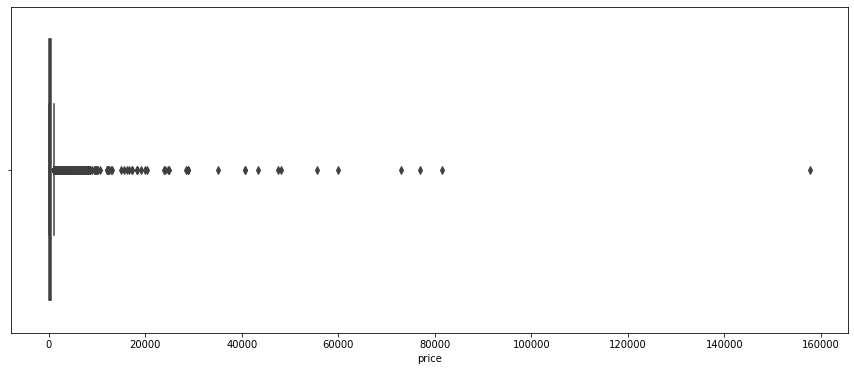

In [15]:
#price analysis
#price text to numeric price variable and remove $ sign because price values are Turkish Lira
plt.figure(figsize = (15,6))
sns.boxplot(df_listing['price']);

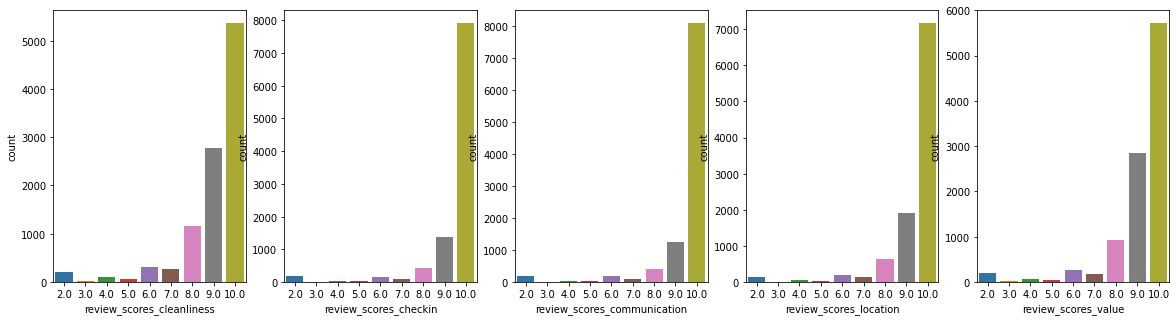

In [16]:
#Review scores
fig,ax= plt.subplots(nrows=1, ncols= 5,figsize=(20,5))

sns.countplot(df_listing['review_scores_cleanliness'],ax=ax[0])

sns.countplot(df_listing['review_scores_checkin'],ax=ax[1])

sns.countplot(df_listing['review_scores_communication'],ax=ax[2])

sns.countplot(df_listing['review_scores_location'],ax=ax[3])

sns.countplot(df_listing['review_scores_value'],ax=ax[4])

plt.show()

I think we can not fill na values with mean because their prices significantly different

In [17]:
check_nulls(df_listing)

review_scores_value            12087
review_scores_checkin          12086
review_scores_accuracy         12086
review_scores_location         12085
review_scores_cleanliness      12083
review_scores_communication    12082
review_scores_rating           12077
reviews_per_month              11599
host_acceptance_rate            8097
host_response_time              6719
host_response_rate              6719
bedrooms                        1872
beds                             693
host_total_listings_count         10
host_is_superhost                 10
host_has_profile_pic              10
host_identity_verified            10
host_since                        10
dtype: int64


In [18]:
review_fill_min_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                        'review_scores_checkin','review_scores_communication','review_scores_location',
                        'review_scores_value']

for col in review_fill_min_cols:
    minimum = min(df_listing[col])
    df_listing[col].fillna(minimum,inplace = True)

In [19]:
check_nulls(df_listing)

reviews_per_month            11599
host_acceptance_rate          8097
host_response_rate            6719
host_response_time            6719
bedrooms                      1872
beds                           693
host_identity_verified          10
host_has_profile_pic            10
host_total_listings_count       10
host_is_superhost               10
host_since                      10
dtype: int64


In [20]:
df_listing[df_listing['host_since'].isna()].host_id.unique()

#3 hosts have null values

array([ 33104525,  20032599, 258013771], dtype=int64)

In [21]:
def find_and_fill(df,host_id,column,fill_value):
    df.loc[df['host_id'] == host_id,column] = fill_value

In [22]:
#Manuelly get the values from host_urls
find_and_fill(df_listing, 33104525,'host_since',pd.to_datetime('2015-05-01',format = '%Y-%m-%d'))
find_and_fill(df_listing, 33104525,'host_is_superhost',False)
find_and_fill(df_listing, 33104525,'host_total_listings_count',8)
find_and_fill(df_listing, 33104525,'host_has_profile_pic',True)
find_and_fill(df_listing, 33104525,'host_identity_verified',True)
find_and_fill(df_listing, 33104525,'host_response_rate',100)
find_and_fill(df_listing, 33104525,'host_response_time','within an hour')



find_and_fill(df_listing, 20032599,'host_since',pd.to_datetime('2014-08-01',format = '%Y-%m-%d'))
find_and_fill(df_listing, 20032599,'host_is_superhost',False)
find_and_fill(df_listing, 20032599,'host_total_listings_count',1)
find_and_fill(df_listing, 20032599,'host_has_profile_pic',True)
find_and_fill(df_listing, 20032599,'host_identity_verified',False)
find_and_fill(df_listing, 20032599,'host_response_rate',0)


find_and_fill(df_listing, 258013771,'host_since',pd.to_datetime('2019-04-01',format = '%Y-%m-%d'))
find_and_fill(df_listing, 258013771,'host_is_superhost',False)
find_and_fill(df_listing, 258013771,'host_total_listings_count',1)
find_and_fill(df_listing, 258013771,'host_has_profile_pic',True)
find_and_fill(df_listing, 258013771,'host_identity_verified',False)

df_listing['host_since'] = pd.to_datetime(df_listing['host_since'],format="%Y-%m-%d")

today = pd.to_datetime(df_listing['last_scraped'].max(),format = "%Y-%m-%d")

df_listing['host_tenure'] = today.to_period('M') - df_listing['host_since'].apply(lambda x: x.to_period('M'))
df_listing['host_tenure'] = df_listing['host_tenure'].apply(lambda x: x.n)

df_listing.drop('host_since',axis = 1,inplace = True)

In [23]:
check_nulls(df_listing)

reviews_per_month       11599
host_acceptance_rate     8097
host_response_time       6711
host_response_rate       6710
bedrooms                 1872
beds                      693
dtype: int64


In [24]:
#fill beds column with bedrooms by grouping bedrooms with beds mean and fill that value for each bedrooms
beds = df_listing[['beds','bedrooms']]
beds_fill_null = beds.groupby('bedrooms').beds.mean()
max_bedroom_count = beds_fill_null.index.max()


for i in range(1,int(max_bedroom_count)):
    try:
        df_listing.loc[(df_listing['bedrooms'] == i) & (df_listing['bedrooms'].notna()),'beds'] = round(beds_fill_null[i])
    except:
        continue
        
df_listing['beds'].fillna(round(df_listing['beds'].mean()),inplace=True)
df_listing.drop('bedrooms',axis = 1,inplace = True)

In [25]:
check_nulls(df_listing)

reviews_per_month       11599
host_acceptance_rate     8097
host_response_time       6711
host_response_rate       6710
dtype: int64


In [26]:
#review_per_month N/A for 0 comments so that i'll fill that value for 0
df_listing['reviews_per_month'].fillna(0,inplace = True)


In [27]:
check_nulls(df_listing)

host_acceptance_rate    8097
host_response_time      6711
host_response_rate      6710
dtype: int64


In [29]:
df_listing['host_response_time'].value_counts()

within an hour        9489
a few days or more    2255
within a few hours    1995
within a day          1878
Name: host_response_time, dtype: int64

In [30]:
df_listing.host_response_rate = df_listing.host_response_rate.fillna('0%')
df_listing.host_acceptance_rate = df_listing.host_acceptance_rate.fillna('0%')
df_listing.drop('host_response_time',axis = 1,inplace =True)

In [32]:
df_listing['host_response_rate'] = perc_to_float(df_listing, 'host_response_rate')
df_listing['host_acceptance_rate'] = perc_to_float(df_listing, 'host_acceptance_rate')

In [33]:
check_nulls(df_listing)

Series([], dtype: int64)


In [34]:
european_side = ['Beyoglu', 'Sisli', 'Fatih', 'Besiktas', 
       'Esenyurt', 'Kagithane',   'Sariyer',
       'Bakirkoy', 'Basaksehir', 'Avcilar',  'Eyup', 
       'Bahcelievler', 'Kucukcekmece',  'Bagcilar', 
        'Zeytinburnu', 'Buyukcekmece', 'Beylikduzu',
        'Arnavutkoy', 'Gaziosmanpasa', 'Gungoren',
        'Silivri', 'Esenler', 'Bayrampasa', 'Catalca',
       'Sultangazi', ]

asian_side = ['Kadikoy','Uskudar','Maltepe','Atasehir',
              'Pendik','Umraniye','Sile','Adalar','Kartal',
              'Beykoz','Tuzla','Sancaktepe','Sultanbeyli', 'Cekmekoy']

centers = ['Beyoglu','Sisli','Fatih','Besiktas','Sariyer','Kadikoy','Uskudar','Adalar','Beykoz']

In [35]:
df_listing.loc[df_listing['neighbourhood_cleansed'].isin(european_side),'continent'] = 'europa'
df_listing.loc[df_listing['neighbourhood_cleansed'].isin(asian_side),'continent'] = 'asia'

df_listing.loc[df_listing['neighbourhood_cleansed'].isin(centers),'center_flag'] = 1
df_listing.loc[~df_listing['neighbourhood_cleansed'].isin(centers),'center_flag'] = 0


In [36]:
bool_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified']

for col in bool_cols:
    df_listing[col] = df_listing[col].astype(int)

In [37]:
df_listing.head()

id last_scraped  host_id                                  host_url  \
0  20815   2020-10-27    78838   https://www.airbnb.com/users/show/78838   
1  27271   2020-10-28   117026  https://www.airbnb.com/users/show/117026   
2  28318   2020-10-28   121721  https://www.airbnb.com/users/show/121721   
3  29241   2020-10-28   125742  https://www.airbnb.com/users/show/125742   
4  30697   2020-10-27   132137  https://www.airbnb.com/users/show/132137   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 0.0                   0.0                  0   
1                 0.0                   0.0                  0   
2                 0.0                   0.0                  0   
3                 0.0                   0.0                  0   
4                 0.0                   0.0                  0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        2.0                     1                       0   
1                        1.0                     1                       1   
2                        1.0                     1                       1   
3                        1.0                     1                       0   
4                        1.0                     1                       1   

  neighbourhood_cleansed        room_type  accommodates  beds   price  \
0               Besiktas  Entire home/apt             3   3.0   965.0   
1                Beyoglu  Entire home/apt             2   1.0   289.0   
2                Sariyer  Entire home/apt             2   3.0  1018.0   
3                Beyoglu     Private room             3   1.0   407.0   
4                Beyoglu     Private room             2   1.0   952.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0             365             900                     365   
1              30              90                      30   
2               3              60                       3   
3               3              15                       3   
4               1               2                       1   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     365                     900                     900   
1                      30                      90                      90   
2                       3                      60                      60   
3                       3                      15                      15   
4                       1                       2                       2   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
0                   365.0                   900.0              True   
1                    30.0                    90.0              True   
2                     3.0                    60.0              True   
3                     3.0                    15.0              True   
4                     1.0                     2.0              True   

   availability_30  availability_60  availability_90  availability_365  \
0               21               51               81               356   
1                0                0                0                 0   
2               28               58               88                88   
3               30               60               90               365   
4               29               59               89               364   

  calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
0            2020-10-27                 41                      0   
1            2020-10-28                 10                      0   
2            2020-10-28                  0                      0   
3            2020-10-28                  0                      0   
4            2020-10-27                  1                      0   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                       0                  90.0     

# Some Descriptions

In [38]:
len(df_listing.host_id.unique())

12651

''

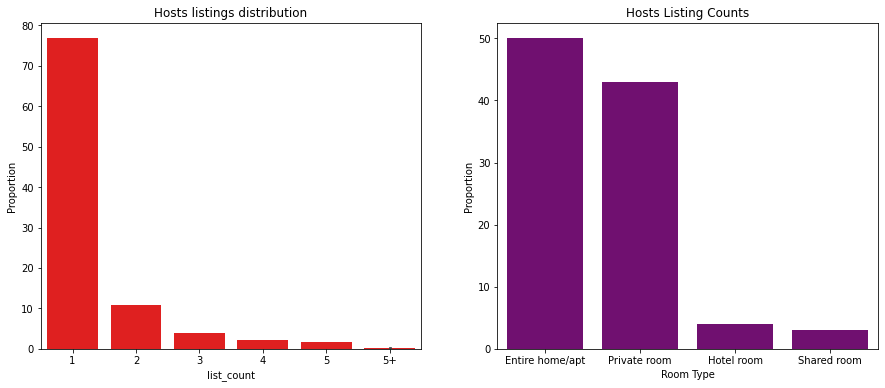

In [39]:
host_list_counts = df_listing.groupby('host_id').id.size().reset_index()
host_list_counts.columns = ['host_id','list_count']
host_list_counts = host_list_counts.groupby('list_count').host_id.count().reset_index()
host_list_counts.columns = ['list_count','Count Host']
host_list_counts['Proportion'] = (host_list_counts['Count Host'] / host_list_counts['Count Host'].sum())*100
host_list_counts.loc[host_list_counts['list_count'] > 5, 'list_count'] = '5+'

room_types = round((df_listing.room_type.value_counts() / df_listing.shape[0])*100).reset_index()
room_types.columns = ['Room Type','Proportion']


fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'list_count', y = 'Proportion', data = host_list_counts,color = 'red', ax = ax[0])
ax[0].set_title('Hosts listings distribution')
;

sns.barplot(x = 'Room Type', y = 'Proportion', data = room_types,color = 'purple',ax = ax[1])
ax[1].set_title('Hosts Listing Counts')
;


''

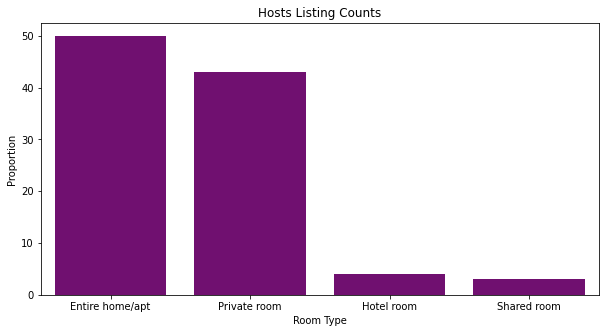

In [40]:
room_types = round((df_listing.room_type.value_counts() / df_listing.shape[0])*100).reset_index()
room_types.columns = ['Room Type','Proportion']

plt.figure(figsize=(10,5))
sns.barplot(x = 'Room Type', y = 'Proportion', data = room_types,color = 'purple')
plt.title('Hosts Listing Counts')
;

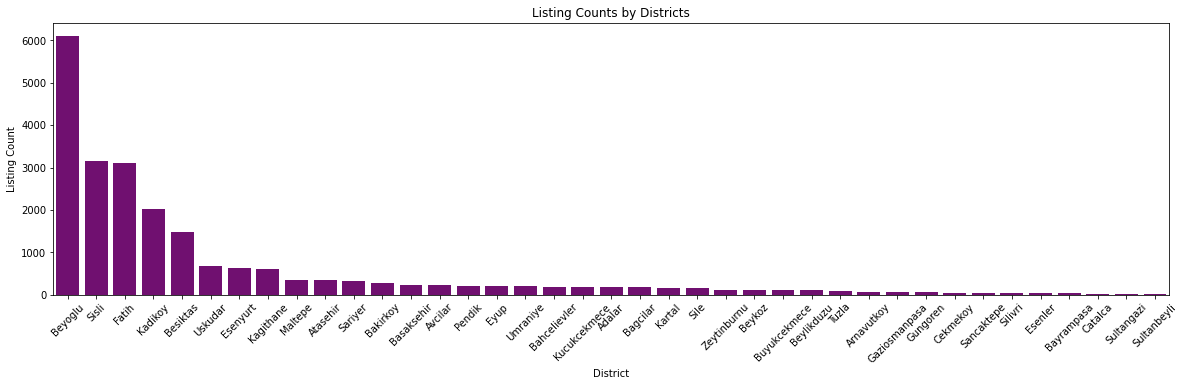

In [41]:
districts = df_listing.groupby('neighbourhood_cleansed').size().sort_values(ascending = False).reset_index()
districts.columns = ['District','Listing Count']

plt.figure(figsize=(20,5))
sns.barplot(x = 'District',y = 'Listing Count', data = districts, color='purple')
plt.title('Listing Counts by Districts')
plt.xticks(rotation = 45);


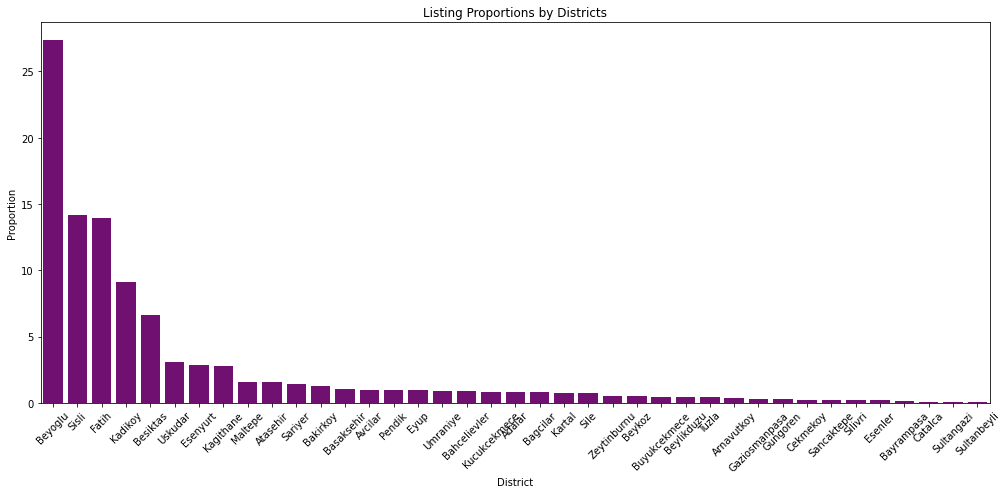

In [42]:
districts = (df_listing.groupby('neighbourhood_cleansed').size() / df_listing.shape[0]*100).sort_values(ascending = False).reset_index()
districts.columns = ['District','Listing Count']

plt.figure(figsize=(17,7))
sns.barplot(x = 'District',y = 'Listing Count', data = districts, color='purple')
plt.title('Listing Proportions by Districts')
plt.ylabel('Proportion')
plt.xticks(rotation = 45);

In [43]:
df_listing[df_listing['host_is_superhost'] == 1].shape

(2819, 69)

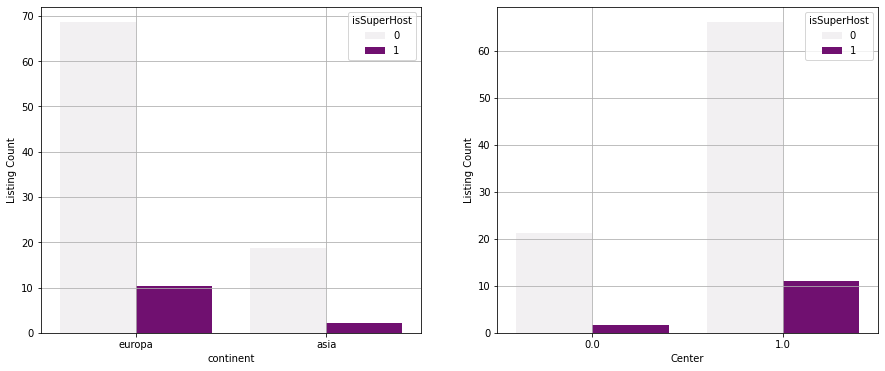

In [44]:
continents = (df_listing.groupby(['continent','host_is_superhost']).size() / df_listing.shape[0]*100).sort_values(ascending = False).reset_index()
continents.columns = ['continent','isSuperHost','Listing Count']

centers = (df_listing.groupby(['center_flag','host_is_superhost']).size() / df_listing.shape[0]*100).sort_values(ascending = False).reset_index()
centers.columns = ['Center','isSuperHost','Listing Count']




fig, ax = plt.subplots(1,2,figsize = (15,6))

sns.barplot(x = 'continent',y = 'Listing Count', hue = 'isSuperHost',data = continents, color='purple',ax = ax[0])

ax[0].grid()

sns.barplot(x = 'Center',y = 'Listing Count', hue = 'isSuperHost', data = centers, color='purple',ax = ax[1]);
ax[1].grid()



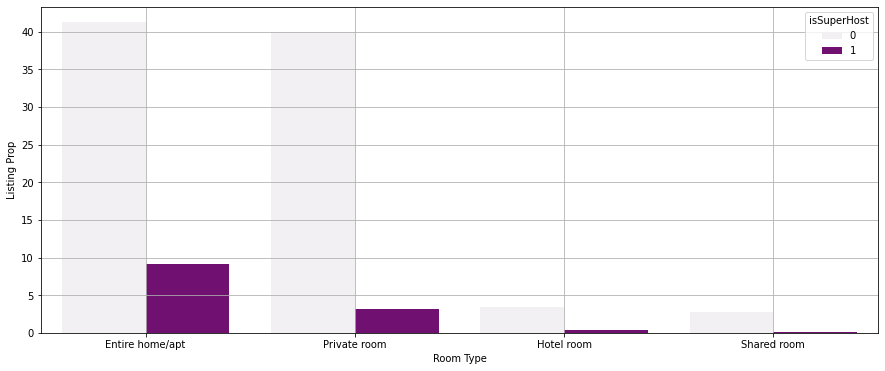

In [45]:
room_type = (df_listing.groupby(['room_type','host_is_superhost']).size() / df_listing.shape[0]*100).sort_values(ascending = False).reset_index()
room_type.columns = ['Room Type','isSuperHost','Listing Prop']

plt.figure(figsize = (15,6))
sns.barplot(x = 'Room Type',y = 'Listing Prop',hue = 'isSuperHost', data = room_type, color='purple');
plt.grid()




## Investigate Price Distributions

In [46]:
price_desc = df_listing.describe()['price']

Minimum: 0.00, Maximum: 157693.00, Mean: 511.83, std : 1904.44 


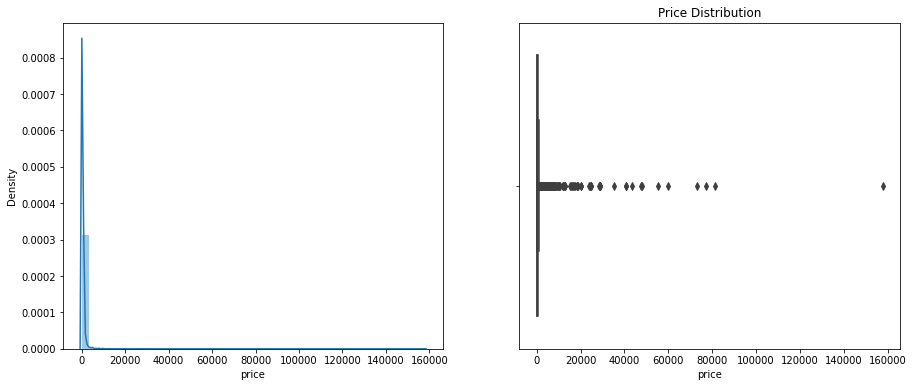

In [47]:
fig , ax = plt.subplots(1,2, figsize = (15,6))
plt.title('Price Distribution')
sns.distplot(df_listing['price'],ax = ax[0]);
sns.boxplot(df_listing['price'],ax = ax[1])
print("Minimum: {:.2f}, Maximum: {:.2f}, Mean: {:.2f}, std : {:.2f} ".format(price_desc['min'],price_desc['max'],price_desc['mean'],price_desc['std']))

Minimum: 0.00, Maximum: 157693.00, Mean: 511.83, std : 1904.44 


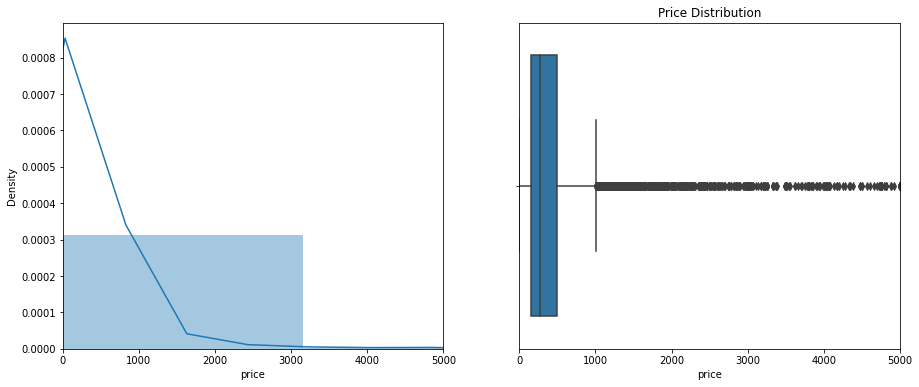

In [48]:
fig , ax = plt.subplots(1,2, figsize = (15,6))
plt.title('Price Distribution')
sns.distplot(df_listing['price'],ax = ax[0]);
sns.boxplot(df_listing['price'],ax = ax[1])
print("Minimum: {:.2f}, Maximum: {:.2f}, Mean: {:.2f}, std : {:.2f} ".format(price_desc['min'],price_desc['max'],price_desc['mean'],price_desc['std']))

ax[0].set_xlim(0,5000)
ax[1].set_xlim(0,5000);

price is highly right skewed and there is some potential outliers, nearly 160K Turkish Lira there is absolute outlier I'm gonna drop it

Minimum: 0.00, Maximum: 157693.00, Mean: 511.83, std : 1904.44 


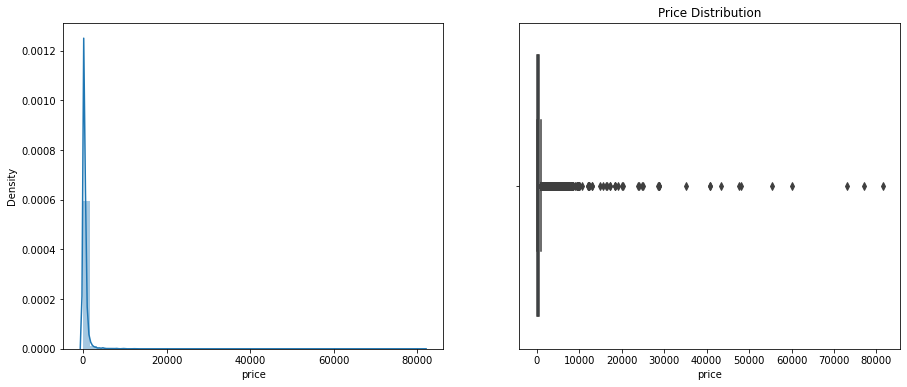

In [49]:
df_listing = df_listing[df_listing['price'] < 150000]

fig , ax = plt.subplots(1,2, figsize = (15,6))
plt.title('Price Distribution')
sns.distplot(df_listing['price'],ax = ax[0]);
sns.boxplot(df_listing['price'],ax = ax[1])
print("Minimum: {:.2f}, Maximum: {:.2f}, Mean: {:.2f}, std : {:.2f} ".format(price_desc['min'],price_desc['max'],price_desc['mean'],price_desc['std']))

In [50]:
df_listing.head()

id last_scraped  host_id                                  host_url  \
0  20815   2020-10-27    78838   https://www.airbnb.com/users/show/78838   
1  27271   2020-10-28   117026  https://www.airbnb.com/users/show/117026   
2  28318   2020-10-28   121721  https://www.airbnb.com/users/show/121721   
3  29241   2020-10-28   125742  https://www.airbnb.com/users/show/125742   
4  30697   2020-10-27   132137  https://www.airbnb.com/users/show/132137   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 0.0                   0.0                  0   
1                 0.0                   0.0                  0   
2                 0.0                   0.0                  0   
3                 0.0                   0.0                  0   
4                 0.0                   0.0                  0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        2.0                     1                       0   
1                        1.0                     1                       1   
2                        1.0                     1                       1   
3                        1.0                     1                       0   
4                        1.0                     1                       1   

  neighbourhood_cleansed        room_type  accommodates  beds   price  \
0               Besiktas  Entire home/apt             3   3.0   965.0   
1                Beyoglu  Entire home/apt             2   1.0   289.0   
2                Sariyer  Entire home/apt             2   3.0  1018.0   
3                Beyoglu     Private room             3   1.0   407.0   
4                Beyoglu     Private room             2   1.0   952.0   

   minimum_nights  maximum_nights  minimum_minimum_nights  \
0             365             900                     365   
1              30              90                      30   
2               3              60                       3   
3               3              15                       3   
4               1               2                       1   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                     365                     900                     900   
1                      30                      90                      90   
2                       3                      60                      60   
3                       3                      15                      15   
4                       1                       2                       2   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
0                   365.0                   900.0              True   
1                    30.0                    90.0              True   
2                     3.0                    60.0              True   
3                     3.0                    15.0              True   
4                     1.0                     2.0              True   

   availability_30  availability_60  availability_90  availability_365  \
0               21               51               81               356   
1                0                0                0                 0   
2               28               58               88                88   
3               30               60               90               365   
4               29               59               89               364   

  calendar_last_scraped  number_of_reviews  number_of_reviews_ltm  \
0            2020-10-27                 41                      0   
1            2020-10-28                 10                      0   
2            2020-10-28                  0                      0   
3            2020-10-28                  0                      0   
4            2020-10-27                  1                      0   

   number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
0                       0                  90.0     

In [51]:
bool_vars = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','continent','host_verifications_email', 'host_verifications_ phone',
       'host_verifications_ government_id', 'host_verifications_ reviews',
       'host_verifications_ offline_government_id',
       'host_verifications_ jumio', 'host_verifications_ selfie',
       'host_verifications_ facebook', 'host_verifications_ work_email',
       'host_verifications_ identity_manual', 'amenities_ Heating',
       'amenities_ Kitchen', 'amenities_ Hair dryer', 'amenities_ TV',
       'amenities_ Iron', 'amenities_ Shampoo', 'amenities_ Hangers',
       'amenities_ Washer', 'amenities_ Wifi',
       'amenities_ Laptop-friendly workspace']

<AxesSubplot:>

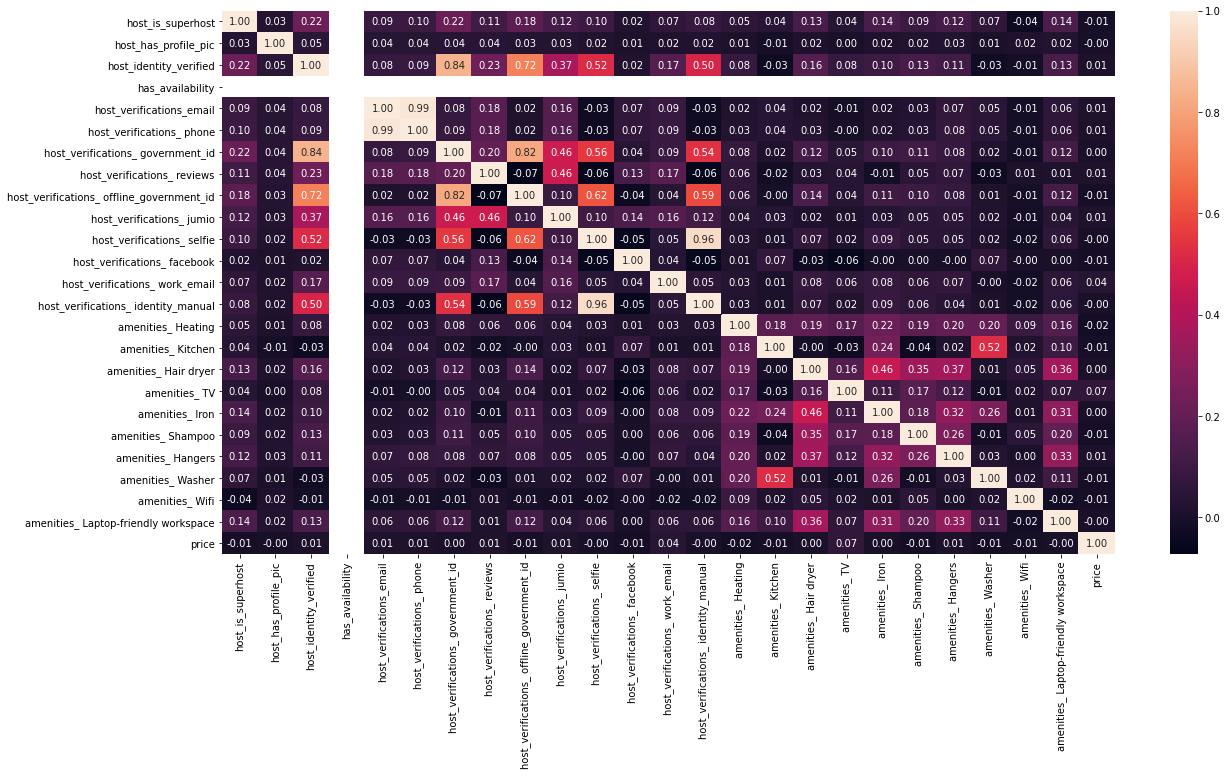

In [52]:
plt.figure(figsize = (20,10))
corr_booleans = df_listing[bool_vars + ['price']].corr()
sns.heatmap(corr_booleans,annot=True,fmt = '.2f')

In [53]:
df_listing.drop(['host_verifications_ government_id',
                 'host_verifications_ offline_government_id','host_verifications_ selfie'],axis = 1,inplace = True)

has availability column has no variance so i'm gonna drop it
higher price listings has no profile pic and not superhost
host identity verified has no significant difference in price i'mgonna drop it

In [54]:
df_listing.drop(['has_availability','host_identity_verified'],axis = 1,inplace = True)

In [55]:
numeric_cols = ['host_response_rate','host_acceptance_rate',
                'host_total_listings_count','accommodates','beds','minimum_nights',
                'maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
                'minimum_maximum_nights','maximum_maximum_nights',
                'minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30',
                'availability_60','availability_90','availability_365','number_of_reviews',
                'number_of_reviews_ltm','number_of_reviews_l30d','review_scores_rating',
                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_checkin',
                'review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms','reviews_per_month','bathroom','host_tenure',
                'price']

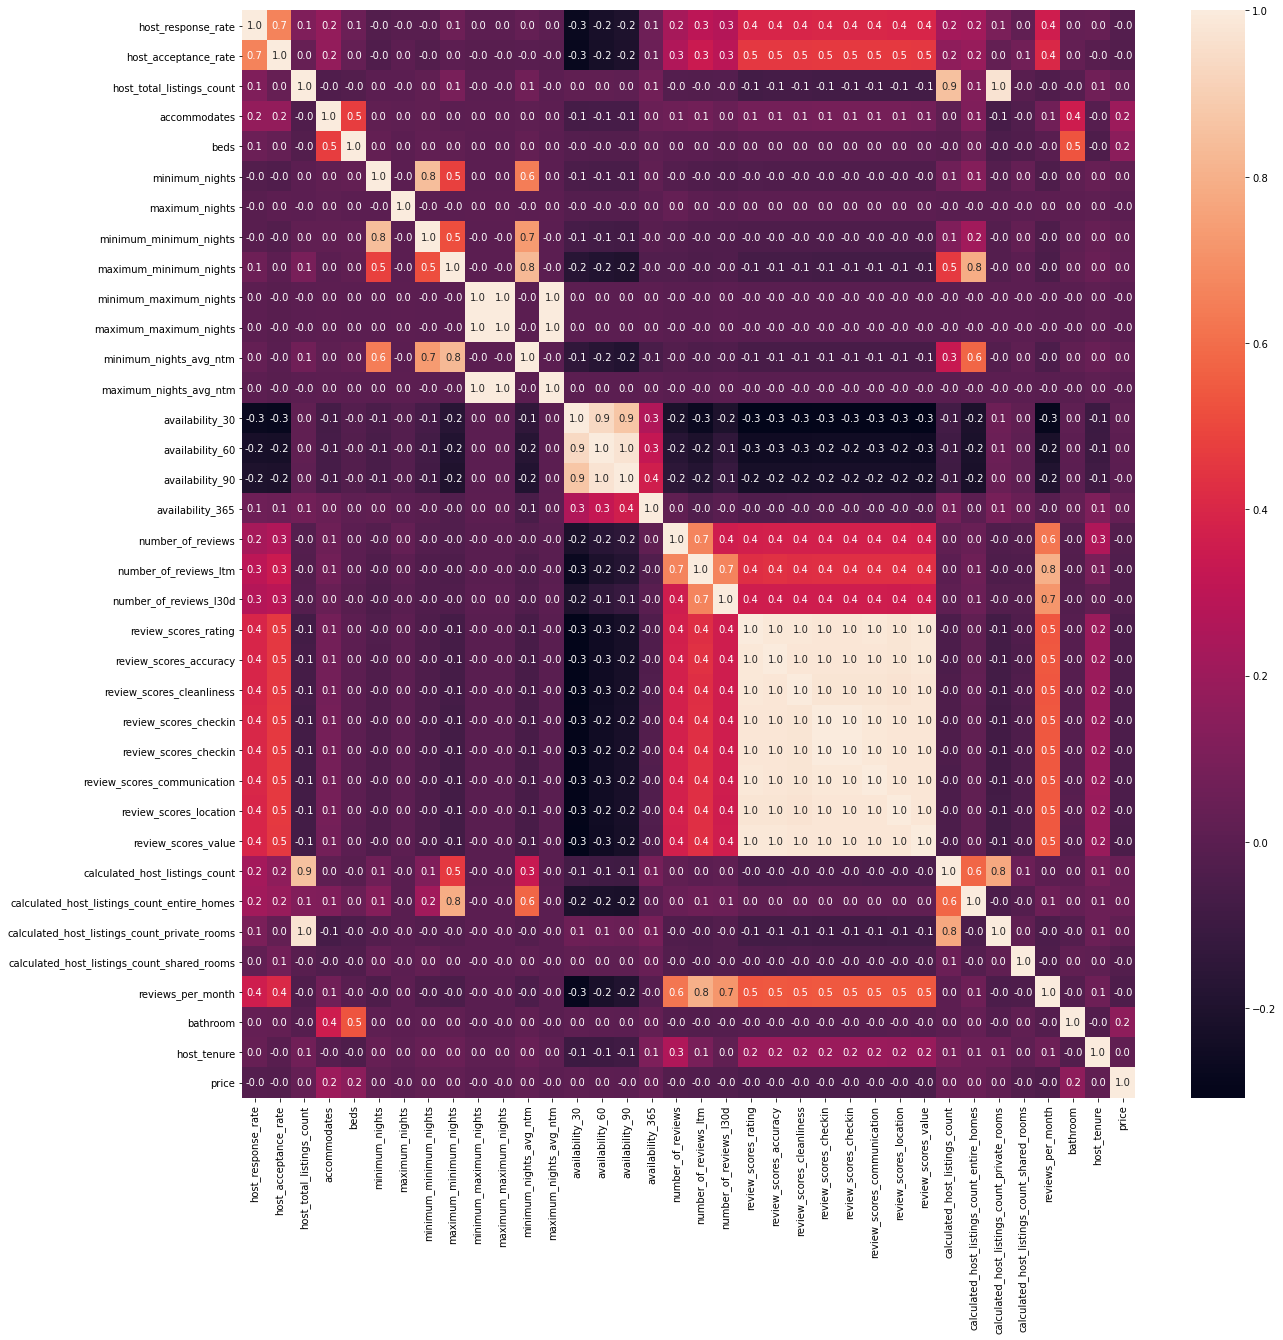

In [56]:
corr = df_listing[numeric_cols].corr()

plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True,fmt='.1f');

- price is slightly correlated with accomodates,beds bathroom
- host response rate and host acceptance rates are highly correlated
- host_total_listing_count highly correlated with calculated_host_listings_count and calculated_host_count_private_rooms
- minimum_nights is highly correlated with minimum_minimum_nights
- review scores are full correlated
- availabilities are correlated each other
 

In [57]:
numeric_drop_cols = ['host_acceptance_rate',
                'minimum_minimum_nights','maximum_minimum_nights',
                'minimum_maximum_nights','maximum_maximum_nights',
                'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                'availability_60','availability_90','availability_365',
                'number_of_reviews_ltm','number_of_reviews_l30d',
                'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_checkin',
                'review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms']

In [58]:
df_model = df_listing.copy()

In [59]:
df_model.drop(numeric_drop_cols,axis = 1,inplace=True)

In [60]:
df_model.head()

id last_scraped  host_id                                  host_url  \
0  20815   2020-10-27    78838   https://www.airbnb.com/users/show/78838   
1  27271   2020-10-28   117026  https://www.airbnb.com/users/show/117026   
2  28318   2020-10-28   121721  https://www.airbnb.com/users/show/121721   
3  29241   2020-10-28   125742  https://www.airbnb.com/users/show/125742   
4  30697   2020-10-27   132137  https://www.airbnb.com/users/show/132137   

   host_response_rate  host_is_superhost  host_total_listings_count  \
0                 0.0                  0                        2.0   
1                 0.0                  0                        1.0   
2                 0.0                  0                        1.0   
3                 0.0                  0                        1.0   
4                 0.0                  0                        1.0   

   host_has_profile_pic neighbourhood_cleansed        room_type  accommodates  \
0                     1               Besiktas  Entire home/apt             3   
1                     1                Beyoglu  Entire home/apt             2   
2                     1                Sariyer  Entire home/apt             2   
3                     1                Beyoglu     Private room             3   
4                     1                Beyoglu     Private room             2   

   beds   price  minimum_nights  maximum_nights  availability_30  \
0   3.0   965.0             365             900               21   
1   1.0   289.0              30              90                0   
2   3.0  1018.0               3              60               28   
3   1.0   407.0               3              15               30   
4   1.0   952.0               1               2               29   

  calendar_last_scraped  number_of_reviews  review_scores_rating  \
0            2020-10-27                 41                  90.0   
1            2020-10-28                 10                  98.0   
2            2020-10-28                  0                  20.0   
3            2020-10-28                  0                  20.0   
4            2020-10-27                  1                  80.0   

   instant_bookable  calculated_host_listings_count_entire_homes  \
0             False                                            1   
1             False                                            1   
2             False                                            1   
3             False                                            0   
4              True                                            0   

   reviews_per_month  host_verifications_email  host_verifications_ phone  \
0               0.32                       1.0                        1.0   
1               0.32                       1.0                        1.0   
2               0.00                       1.0                        1.0   
3               0.00                       1.0                        1.0   
4               0.01                       0.0                        0.0   

   host_verifications_ reviews  host_verifications_ jumio  \
0                          1.0                        0.0   
1                          1.0                        1.0   
2                          1.0                        1.0   
3                          0.0                        0.0   
4                          1.0                        1.0   

   host_verifications_ facebook  host_verifications_ work_email  \
0                           1.0                             1.0   
1                           1.0                             0.0   
2                           0.0                             0.0   
3                           1.0                             0.0   
4                           0.0                             0.0   

   host_verifications_ identity_manual  amenities_ Heating  \
0                                  0.0                 1.0   
1                                  0.0             

(0.0, 2000.0)

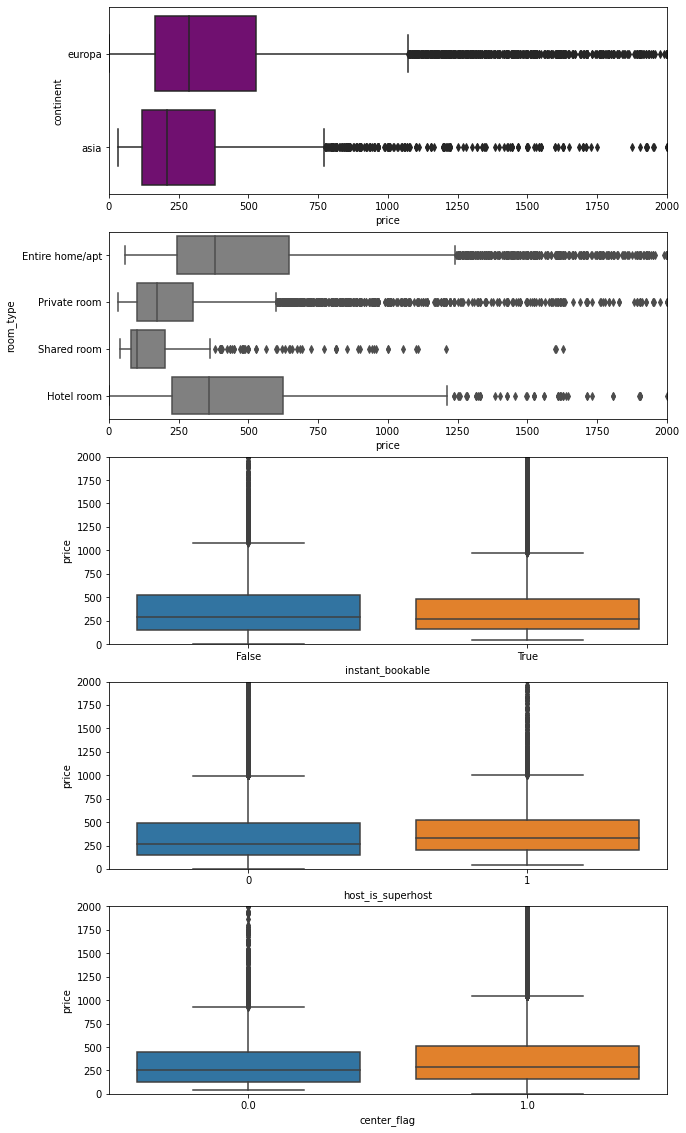

In [61]:
fig, ax = plt.subplots(5,1,figsize = (10,20))

sns.boxplot(x = 'price', y = 'continent', data = df_model, ax = ax[0], color = 'purple')
ax[0].set_xlim(0,2000)

sns.boxplot(x = 'price', y = 'room_type', data = df_model, ax = ax[1], color = 'grey')
ax[1].set_xlim(0,2000)


sns.boxplot(y = 'price', x = 'instant_bookable', data = df_model, ax = ax[2])
ax[2].set_ylim(0,2000)

sns.boxplot(y = 'price', x = 'host_is_superhost', data = df_model, ax = ax[3])
ax[3].set_ylim(0,2000)

sns.boxplot(y = 'price', x = 'center_flag', data = df_model, ax = ax[4])
ax[4].set_ylim(0,2000)

europe has higher price than asia,
entire homes are likely to hotel rooms price than entire homes are very comfortable i think
actually prices are not depend on instan bookable, superhost,center or not center 

In [62]:
df_model.drop(['instant_bookable','host_is_superhost','center_flag','neighbourhood_cleansed'],axis = 1,inplace = True)

In [65]:
#add dummy variables of room_type and continent
df_model = df_model.join(pd.get_dummies(df_model['room_type'],drop_first=True)).drop('room_type',axis = 1)
df_model = df_model.join(pd.get_dummies(df_model['continent'],drop_first = True)).drop('continent',axis = 1)

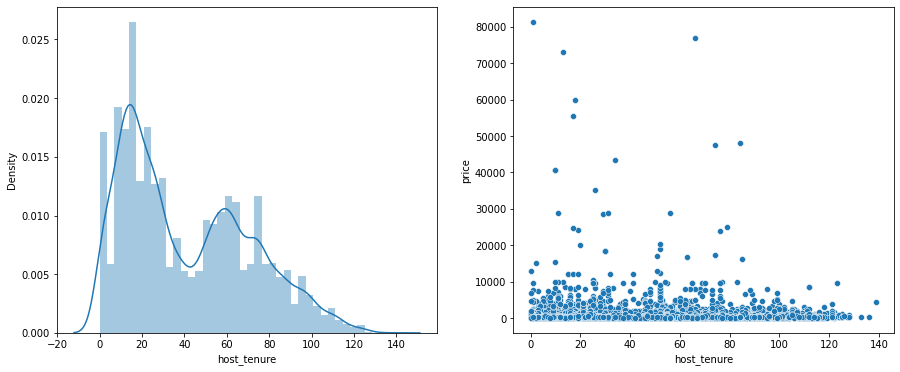

In [68]:
#Distribution of host tenure
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.distplot(df_model['host_tenure'],ax = ax[0])
sns.scatterplot('host_tenure','price',data = df_model,ax = ax[1]);


based on host tenure attribute there is 2 group i have seen in the distplot 

In [69]:
#Change host_tenure to old_host 1,0 Format
df_model.loc[df_model['host_tenure'] >= 40,'old_host'] = 1
df_model.loc[df_model['host_tenure'] < 40,'old_host'] = 0
df_model.drop('host_tenure',axis = 1,inplace = True)

(0.0, 2000.0)

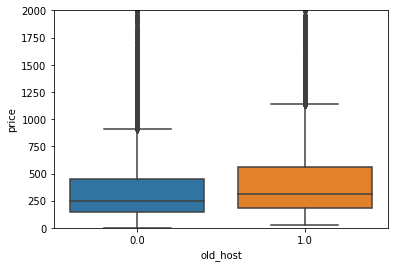

In [70]:
sns.boxplot(x = 'old_host',y = 'price', data = df_model)
plt.ylim(0,2000)

In [71]:
#Convert host_response_rate to 1,0 Format because distribution of host_response stacks in 0 or 100
df_model.loc[df_model['host_response_rate'] >= 50,'frequent_response'] = 1
df_model.loc[df_model['host_response_rate'] < 50,'frequent_response'] = 0
df_model.drop('host_response_rate',axis = 1,inplace = True)

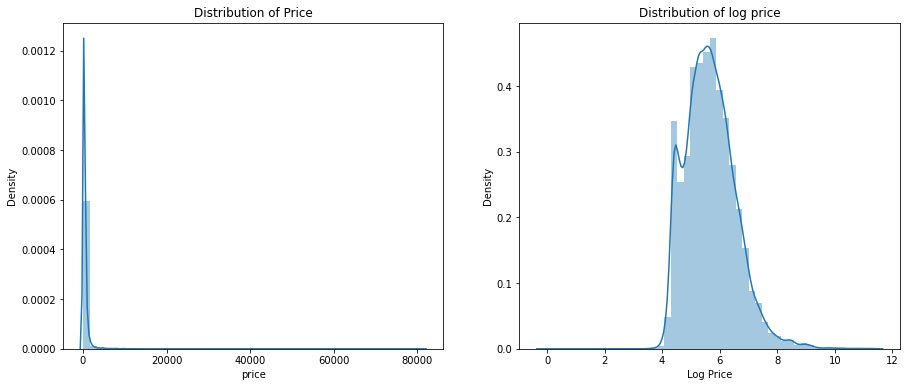

In [72]:
#Transform variable price to log(price) for normality
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.distplot(df_model.price,ax = ax[0]);
sns.distplot(np.log1p(df_model.price),ax = ax[1]);
ax[0].set_title('Distribution of Price')
ax[1].set_title('Distribution of log price');
ax[1].set_xlabel('Log Price');

In [73]:
#drop unnecessary columns
drop_cols = ['id', 'last_scraped','host_id','host_url','calendar_last_scraped']

for col in drop_cols:
    df_model.drop(col,axis = 1, inplace = True)

##  Modeling

In [74]:
df_model.head()

host_total_listings_count  host_has_profile_pic  accommodates  beds  \
0                        2.0                     1             3   3.0   
1                        1.0                     1             2   1.0   
2                        1.0                     1             2   3.0   
3                        1.0                     1             3   1.0   
4                        1.0                     1             2   1.0   

    price  minimum_nights  maximum_nights  availability_30  number_of_reviews  \
0   965.0             365             900               21                 41   
1   289.0              30              90                0                 10   
2  1018.0               3              60               28                  0   
3   407.0               3              15               30                  0   
4   952.0               1               2               29                  1   

   review_scores_rating  calculated_host_listings_count_entire_homes  \
0                  90.0                                            1   
1                  98.0                                            1   
2                  20.0                                            1   
3                  20.0                                            0   
4                  80.0                                            0   

   reviews_per_month  host_verifications_email  host_verifications_ phone  \
0               0.32                       1.0                        1.0   
1               0.32                       1.0                        1.0   
2               0.00                       1.0                        1.0   
3               0.00                       1.0                        1.0   
4               0.01                       0.0                        0.0   

   host_verifications_ reviews  host_verifications_ jumio  \
0                          1.0                        0.0   
1                          1.0                        1.0   
2                          1.0                        1.0   
3                          0.0                        0.0   
4                          1.0                        1.0   

   host_verifications_ facebook  host_verifications_ work_email  \
0                           1.0                             1.0   
1                           1.0                             0.0   
2                           0.0                             0.0   
3                           1.0                             0.0   
4                           0.0                             0.0   

   host_verifications_ identity_manual  amenities_ Heating  \
0                                  0.0                 1.0   
1                                  0.0                 1.0   
2                                  0.0                 1.0   
3                                  0.0                 0.0   
4                                  0.0                 1.0   

   amenities_ Kitchen  amenities_ Hair dryer  amenities_ TV  amenities_ Iron  \
0                 1.0                    1.0            1.0              1.0   
1                 1.0                    1.0            1.0              1.0   
2                 1.0                    0.0            0.0              0.0   
3                 1.0                    0.0            1.0              0.0   
4                 1.0                    1.0            1.0              0.0   

   amenities_ Shampoo  amenities_ Hangers  amenities_ Washer  amenities_ Wifi  \
0                 1.0                 1.0                1.0              0.0   
1                 1.0                 1.0                1.0              0.0   
2                 1.0                 0.0                1.0              1.0   
3                 1.0                 0.0                1.0              1.0   
4                 0.0                 0.0                1.0              1.0   

   amenities_ Laptop-friendly workspace  bathroom  Hotel room  P

In [75]:
# X,y seperation
X = df_model.drop('price',axis = 1)
y = np.log1p(df_model.price)

In [76]:
# Scale independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
#Random forest fit
lm_model = RandomForestRegressor(max_depth = 9,random_state = 42)
lm_model.fit(X,y)

RandomForestRegressor(max_depth=9, random_state=42)

In [78]:
#predict
pred = lm_model.predict(X)

r2 Score: 0.59, MSE : 0.32


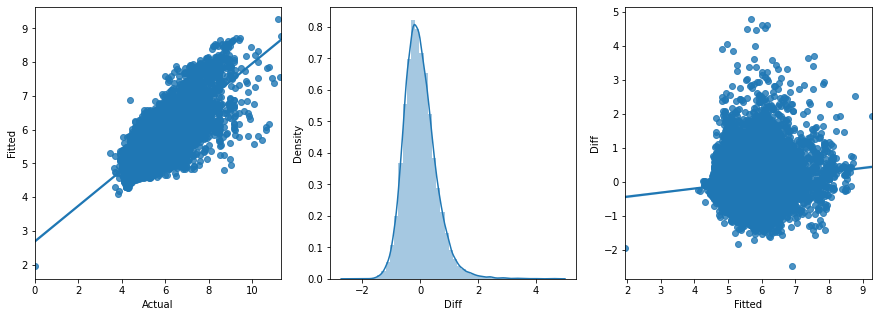

In [79]:
#show results
result = actual_vs_predicted(y,pred)

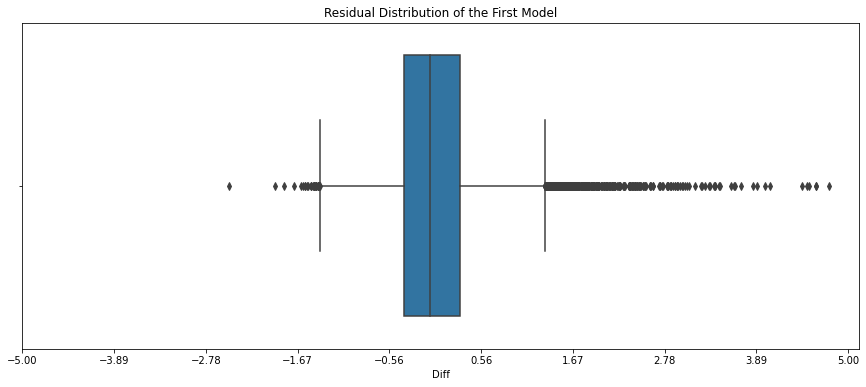

In [80]:
#Error distribution
plt.figure(figsize = (15,6))
plt.title('Residual Distribution of the First Model')
sns.boxplot(result['Diff'])
plt.xticks(np.linspace(-5,5,10));

In [81]:
#Outlier detection
outliers = result[(result['Diff'] >= 1.7) | (result['Diff'] <= -1.7)]

In [82]:
len(outliers.index)

237

In [83]:
#Drop outliers
df_model_dropped = df_model.drop(outliers.index)

In [84]:
#X,y seperation again
X = df_model_dropped.drop('price',axis = 1)
y = np.log1p(df_model_dropped.price)

In [85]:
#Train Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 123)

In [86]:
#Fit X_train to scaler and just transform X_test with the scaler which i created 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
#Random Forest Again
lm_model = RandomForestRegressor(max_depth = 9, random_state = 42)
lm_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, random_state=42)

In [88]:
#Get predictions
pred_train = lm_model.predict(X_train)
pred_test = lm_model.predict(X_test)

r2 Score: 0.63, MSE : 0.25


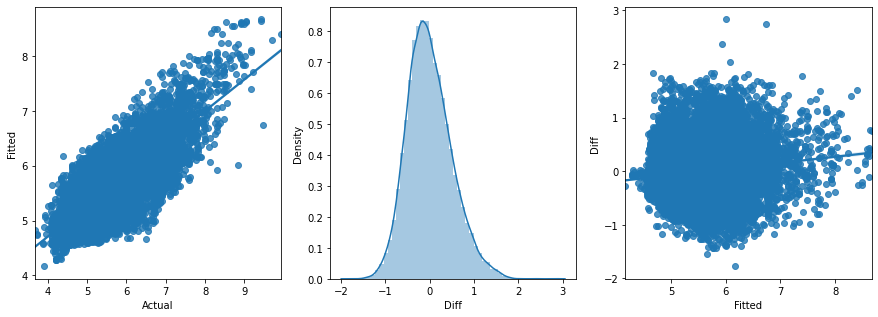

In [89]:
#Train set Results
results = actual_vs_predicted(y_train,pred_train)

r2 Score: 0.57, MSE : 0.31


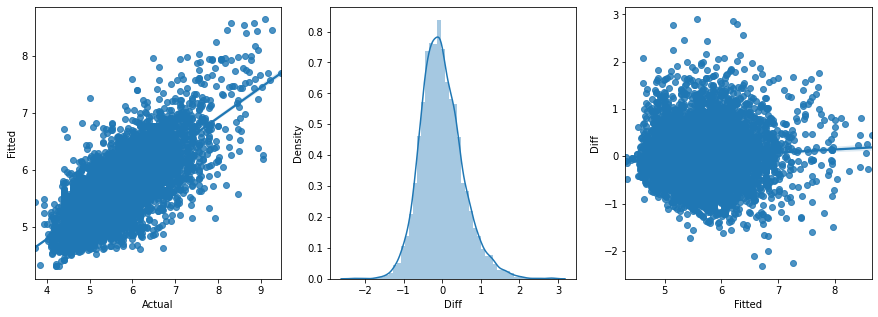

Actual    Fitted      Diff
0     4.820282  5.163698 -0.343416
1     6.375025  5.643182  0.731843
2     5.252273  4.858740  0.393534
3     6.061457  5.856595  0.204862
4     5.707110  6.162830 -0.455719
...        ...       ...       ...
6622  5.802118  6.026119 -0.224001
6623  7.173192  7.025468  0.147724
6624  5.811141  6.034681 -0.223540
6625  4.394449  4.708736 -0.314287
6626  4.744932  5.699110 -0.954178

[6627 rows x 3 columns]

In [90]:
#Test Set Results
actual_vs_predicted(y_test,pred_test)

Train set errors and Test set errors around the 0 but train set errors distributed with in -1 + 1 but test set errors distributed with in -2 +2

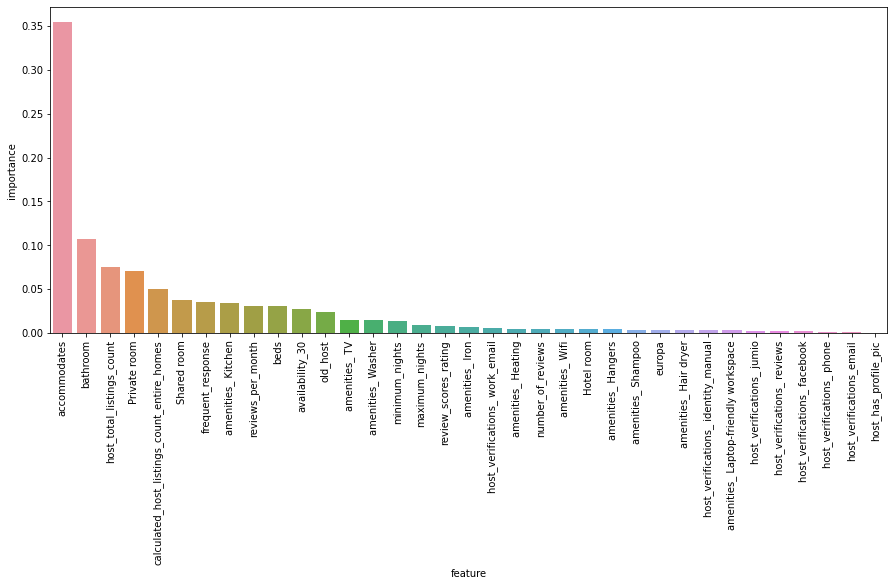

In [91]:
#Feature Importances
importances = pd.DataFrame(list(zip(X.columns,lm_model.feature_importances_)),columns = ['feature','importance'])

plt.figure(figsize = (15,6))
sns.barplot(x = 'feature',y = 'importance', data = importances.sort_values(by = 'importance',ascending = False))
plt.xticks(rotation = 90);

XGB

In [92]:
#Create XGB Regressor
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 50, seed = 123) 

In [93]:
#Fit and get results
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
print("R2Score : % f" %(r2_score(y_test,pred)))
print("MSE : % f" %(mean_squared_error(y_test,pred)))

R2Score :  0.591081
MSE :  0.288910


r2 Score: 0.59, MSE : 0.29


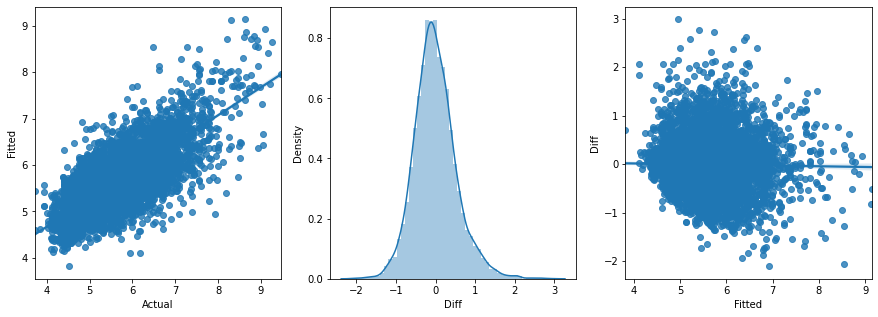

Actual    Fitted      Diff
0     4.820282  5.062906 -0.242625
1     6.375025  5.471455  0.903570
2     5.252273  4.593779  0.658494
3     6.061457  6.117268 -0.055811
4     5.707110  6.397031 -0.689921
...        ...       ...       ...
6622  5.802118  6.302828 -0.500709
6623  7.173192  7.259273 -0.086081
6624  5.811141  6.076920 -0.265779
6625  4.394449  4.904957 -0.510508
6626  4.744932  5.355332 -0.610400

[6627 rows x 3 columns]

In [94]:
#result with test
actual_vs_predicted(y_test,pred)

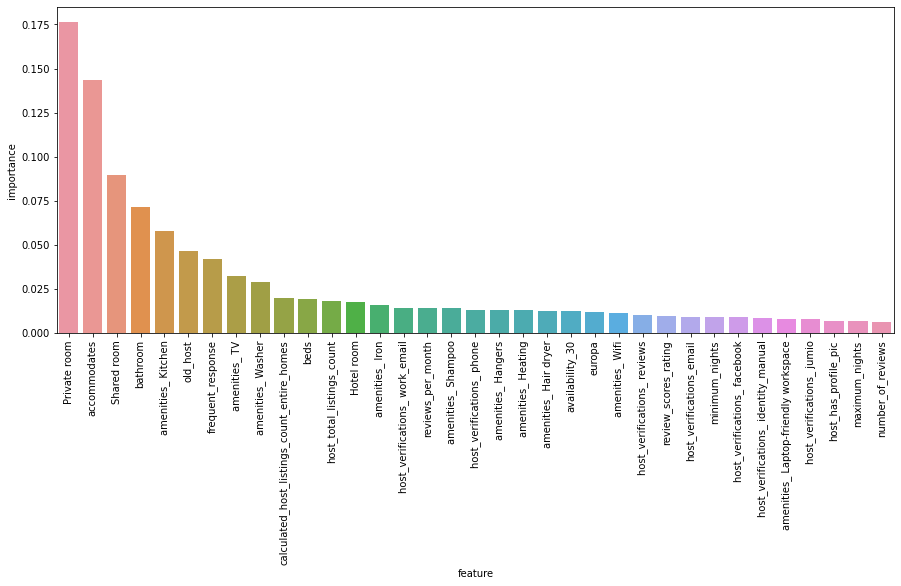

In [95]:
#feature importances
importances = pd.DataFrame(list(zip(X.columns,xgb_r.feature_importances_)),columns = ['feature','importance'])

plt.figure(figsize = (15,6))
sns.barplot(x = 'feature',y = 'importance', data = importances.sort_values(by = 'importance',ascending = False))
plt.xticks(rotation = 90);